<a href="https://colab.research.google.com/github/AKMADOU/Neural_Networks-/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
___
<p align= 'center'> <strong> SESSION ON NEURAL NETWORK IMPLEMENTATION</strong></p>

---
___

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Work in group.
# Part 1: Data preparation

## Import Dataset Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(3)

`Question 0: Import the dataset Dataset`

In [ ]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


`Question 1: write a function that scale your features`.

`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [ ]:
##### WRITE YOUR CODE HERE #####
def scale(x):
  """
  Parameters
  -------
    x: dataframe

  Returns
  -------
    x_scaled: dataframe
  
  """
  x_scaled= (x-x.mean(0))/x.std(0)
  return x_scaled
#### END CODE ####

`Question 2: Scale your features, except the target.`

In [ ]:
##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1]= scale(data)
print(data)
#### END CODE #### 

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigreeFunction       Age

`Question 3: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).`

`Note:` This function must return an arrays.

In [ ]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  """
  Parameters
  -------
    df: a dataframe
    train_percent: a float
    

  Returns
  -------
    
    x_train: an array
    x_test: an array 
    y_train: an array
    y_test: an array
  
  """
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]

  assert (x_train.shape==(int(0.8*len(data)), 8))
  assert (x_test.shape==(154, 8))
  assert (y_train.shape==(int(0.8*len(data)), ))
  assert (y_test.shape==(154, ))
  print('✅✅✅ Congratulation: Your data is is correctly splitted.')
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [ ]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

✅✅✅ Congratulation: Your data is is correctly splitted.


((614, 8), (614,), (154, 8), (154,))

---
___
<p align= 'center'> <strong> End of Data preparation </strong></p>

---
___

# Activation functions and their derivatives: Review
### <strong> 1. Sigmoid </strong>

1.1. Function:

  <blockquote>Function flattens rather quickly (values go to 0 or 1). This is causing partial derivatives going to zero quickly as well, as a result the weigths cannot be updated and the model cannot learn. This can be mitigated by proper weigth inicialization.
  $$\sigma(x)=\dfrac{1}{1+\exp(-x)}$$ </blockquote>


1.2. Derivative:
$$d\sigma(x)= \sigma(x)\left(1-\sigma(x)\right)$$

  <blockquote> Since the derivative of sigmoid is bounded, this will lead to vanishing gradient problem.</blockquote>

### <strong> 2. Tanh (hyperbolic tangent) </strong>
2.1. Function:

  <blockquote>The tanh function is just another possible functions that can be used as a nonlinear activation function between layers of a neural network. It actually shares a few things in common with the sigmoid activation function. They both look very similar. But while a sigmoid function will map input values to be between 0 and 1, Tanh will map values to be between -1 and 1. </blockquote>

$$tanh(x)= \dfrac{exp(−x)−exp(x)}{exp(x)+exp(−x)}=2σ(2x)−1$$
2.2. Derivative:
$$dtanh(x)= 1- tanh(x)^2$$

  <blockquote>Usually used in hidden layers of a neural network as it’s values lies between-1 to 1.</blockquote>

  <blockquote>Good activation function. But still it suffers from Vanishing gradient problem. </blockquote>

### <strong> 3. Relu (Rectified Linear Unit) </strong>
3.1. Function:

  <blockquote>ReLU functions help to achieve fast convergence, so the model trains quickly. It is also faster to compute derivatives on essentially linear function.</blockquote>

  <blockquote>The issue is with the constant part of the function (where  f(x)=0 ), this is where gradients are zero as well. Gradient descent process cannot continue and training of the model goes to a halt.</blockquote>


$$f(x)= max(0,x)$$ or 
\begin{align}
\text{relu}(x)= \begin{cases}
  x \text{ if } x >0 \\
  0 \text{ Otherwise }
\end{cases}
\end{align}


3.2. Derivative:
\begin{align}
\text{drelu}(x)= \begin{cases}
  1 \text{ if } x >0 \\
  0 \text{ Otherwise }
\end{cases}
\end{align}
  <blockquote>ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.</blockquote>

  <blockquote>To fix this problem another modification was introduced called Leaky ReLu to fix the problem of dying neurons. It introduces a small slope to keep the updates alive.</blockquote>

###<stron> 4. Leaky Relu </strong>

4.1. Function
\begin{align}
\text{leaky_relu}(x)= \begin{cases}
  x \text{ if } x >0 \\
  0.01x \text{ Otherwise }
\end{cases}
\end{align}

4.2. Derivative
\begin{align}
\text{dleaky_relu}(x)= \begin{cases}
  1 \text{ if } x >0 \\
  0.01 \text{ Otherwise }
\end{cases}
\end{align}


# Cross entropy and its derivative: review
$$l(A2,y)= -\dfrac{1}{N}\sum_{i= 1}^{N}\left(y \log A2+ (1-y) \log (1-A2)\right)$$


---
___
<p align= 'center'> <strong> End of reviewing formulas </strong></p>

---
___

# Part 2: Neural Network Implementation

## Activation functions implementation

In [ ]:

def sigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1/(1+exp(-x))

      a list of value between 0 and 1

  """
  sigm=1/(1+np.exp(-x))
  return sigm

In [ ]:
def dsigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: sigmoid(x)*(1- sigmoid(x))

      a list of value of the derivative of sigmoid
  """
  
  dsigm=sigmoid(x)*(1-sigmoid(x))
  return dsigm

In [ ]:
x = np.linspace(-10, 10, 100)


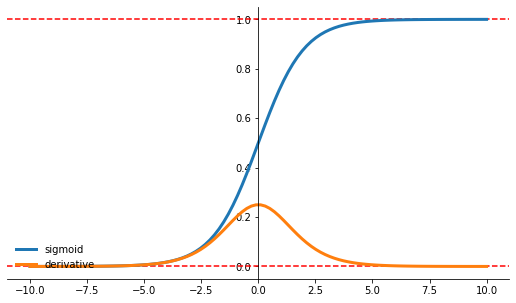

In [ ]:
#Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.axhline(y=1, color="r", linestyle="--")
plt.axhline(y=0, color="r", linestyle="--")
# Create and show plot
ax.plot(x,sigmoid(x), linewidth=3, label="sigmoid")
ax.plot(x,dsigmoid(x), linewidth=3, label="derivative")
ax.legend(loc="lower left", frameon=False)
fig.show()

In [ ]:
def tanh(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: exp(x)-exp(-x)/(exp(x)+exp(-x))

      a list of value between -1 and 1
  """
  t=2*sigmoid(2*x)-1
  return t

In [ ]:
def dtanh(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1- tanh(x)**2

      a list of value of the derivative of sigmoid
  """

  dt=1-tanh(x)**2
  return dt

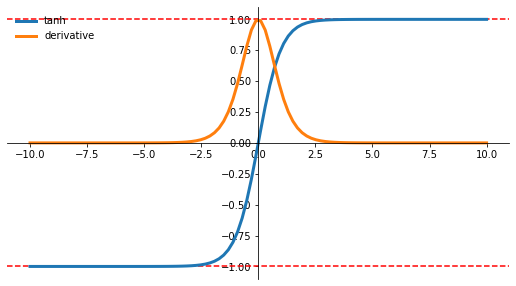

In [ ]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.axhline(y=1, color="r", linestyle="--")
plt.axhline(y=-1, color="r", linestyle="--")
# Create and show plot
ax.plot(x,tanh(x), linewidth=3, label="tanh")
ax.plot(x,dtanh(x), linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

In [ ]:
def ReLU(x):
  """
  Parameters
  ----------
    x: an array

  return:

    y: max(0, x)

      a list of value of from 0 to x. 

  >>>: ReLU(x)= x if x>0 and 0 otherwise
  """
  data = [i if x>0 else 0 for i in x ]
  return np.array(data, dtype=float)

In [ ]:
# Rectified Linear Unit (ReLU)
def ReLU(x):
  """
  Parameters
  ----------
    x: an array

  return:

    y: max(0, x)

      a list of value of from 0 to x. 

  >>>: ReLU(x)= x if x>0 and 0 otherwise
  """
  data = [max(i,0) if i>0 else 0 for i in x ]
  return np.array(data, dtype=float)

# Derivative for ReLU
def der_ReLU(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1 if x >0 and 0 otherwise

      a list of value of derivative of relu.
  """
  data = [1 if i> 0 else 0 for i in x]
  return np.array(data, dtype=float)

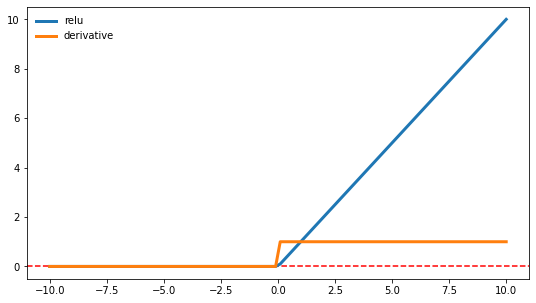

In [ ]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
plt.axhline(y=0, color="r", linestyle="--")
ax.plot(x,ReLU(x), linewidth=3, label="relu")
ax.plot(x,der_ReLU(x), linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

In [ ]:
def leaky_ReLU(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: max(0.01x, x)

      a list of value of from 0.01x to x. 

  >>>: ReLU(x)= x if x>0 and 0.01x otherwise
  """
  data =  [max(0.01*i,i) if i>0 else 0.01*i for i in x ]
  return np.array(data, dtype=float)

In [ ]:
def der_leaky_ReLU(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1 if x >0 and 0.01 otherwise

      a list of value of derivative of leakyrelu.
  """
  data = [1 if i> 0 else 0.01 for i in x]
  return np.array(data, dtype=float)

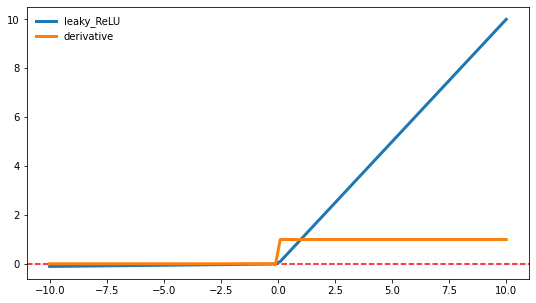

In [ ]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
# Create and show plot
plt.axhline(y=0, color="r", linestyle="--")
ax.plot(x,leaky_ReLU(x), linewidth=3, label="leaky_ReLU")
ax.plot(x,der_leaky_ReLU(x), linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

In [ ]:
def cross_entropy(y,y_pred):
  """
  Parameters
  ----------
    y: an array
    y_pred: array

  return
  ------
    -np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))/len(y): float
  """
  loss=  -np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))/len(y)
  return loss

In [ ]:
## Get dimension of layers
input_dim= data.shape[1]-1
print(input_dim) # number of features
hidden_dim= 12 # number of units in the hideen layer
output_dim= 1 # number of units in the output layer

8


In [ ]:
def weight_initialization(input_dim, hidden_dim, output_dim):

  """
  Parameters
  ---------
    input_dim: an integer
    hidden_dim: an integer
    output_dim: an integer
  
  Return
  ------
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  """
 
  w1 = np.random.randn(hidden_dim*input_dim).reshape(hidden_dim, input_dim)*1e-2 # (hidden_dim, input_dim)
  b1 = np.random.randn(hidden_dim).reshape(hidden_dim,1)  # (hidden_dim, 1)

  w2 =  np.random.randn(output_dim*hidden_dim).reshape(output_dim, hidden_dim)*1e-2 # (output_dim, hidden_dim)
  b2 = np.random.randn(output_dim).reshape(output_dim,1) # (output_dim, 1)

  assert (w1.shape==(hidden_dim, input_dim)), 'check the shape of w1'
  assert (b1.shape==(hidden_dim, 1)), 'check the shape of b1'
  assert (w2.shape==(output_dim, hidden_dim)), 'check the shape of w2'
  assert (b2.shape==(1, 1)), 'check the shape of b2'

  print('✅✅✅ Congratulation: Your initialization is correct.')

  return w1, b1, w2, b2

In [ ]:
w1, b1, w2, b2= weight_initialization(input_dim, hidden_dim, output_dim)

✅✅✅ Congratulation: Your initialization is correct.


In [ ]:
np.random.randn(12).reshape(4,3)

array([[-0.06201575, -0.35445442, -1.42876047],
       [ 1.77509771,  0.76318944,  0.10686951],
       [-0.16573479,  0.26832014, -0.63502971],
       [ 1.49887162,  0.54293495,  0.94558678]])

In [ ]:
def forward_pass(x, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x: an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    z1: an array of shape (N, hidden_dim)
    a1: an array of shape (N, hidden_dim)
    z2: an array of shape (N, output_dim)
    a2: an array of shape (N, output_dim)
  """
  z1= w1@x.T+b1 # Transform x by using w1 and b1
  a1= tanh(z1) # Apply tanh z1

  z2= w2@a1+b2 # Transform z1 by using w2 and b2
  a2=sigmoid(z2)  # Apply sigmoid on z2

  assert (z1.shape==(hidden_dim, x.shape[0])), 'check the shape of z1'
  assert (a1.shape==(hidden_dim, x.shape[0])), 'check the shape of a1'

  assert (z2.shape==(output_dim, x.shape[0])), 'check the shape of z2'
  assert (a2.shape==(output_dim, x.shape[0])), 'check the shape of a2'

  print('Congratulation: Your forward is correct.')
  return z1, a1, z2, a2

In [ ]:
#forward_pass(x_train, w1, b1, w2, b2)

In [ ]:
def backwardpass(x,y, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    dw1: an array of shape (hidden_dim, input_dim)
    db1: an array of shape (hidden_dim, 1). Bias vector
    dw2: an array of shape (output_dim, hidden_dim)
    db2: an array of shape (1, 1)
  """
  
  # Forward pass
  z1, a1, z2,a2= forward_pass(x, w1, b1, w2, b2)
  N= len(x)
  #Backward
 
  # print((a2-y).shape,w2.shape,(1-a1**2).shape,x.T.shape)
  dw1=(((a2-y)*(1-a1**2))*w2.T)@x
  # print('jjjjj',dw1.shape)
  # print(a1.shape)
  # print((a2-y).shape,w2.shape,(1-a2**2).shape)
  # print(b1.shape)
  db1=(np.sum((((a2-y)*(1-a1**2))*w2.T),axis=1)/N).reshape(-1,1)
  # db1= (((a2-y)*(1-a1**2))*w2

  assert (dw1.shape== w1.shape), 'The dimension of dw1 and w1 must be the same'
  assert (db1.shape== b1.shape), 'The dimension of db2 and b1 must be the same'


  dw2= (a2-y)@a1.T
  db2=1/N*np.sum(a2-y,axis=1).reshape(1,1)

  # Dimension check
  assert (dw2.shape== w2.shape), 'The dimension of dw2 and w2 must be the same'
  assert (db2.shape== b2.shape), 'The dimension of db2 and b2 must be the same'

  print('Congratulation: Your Backward is correct.')

  return dw1, db1, dw2, db2

In [ ]:
backwardpass(x_train,y_train, w1, b1, w2, b2)

Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.


(array([[ 0.03694353, -0.02945439,  0.15210166, -0.17029645, -0.20277865,
         -0.37827276,  0.22710945, -0.45188151],
        [ 0.15726018,  0.21148353,  0.62292917, -0.60550606, -0.12882327,
          0.03594495,  0.63869566,  0.44711248],
        [-0.08520466,  0.37955888, -0.39641555,  0.52620748, -0.27956371,
         -0.53499474,  1.42789256, -0.17713296],
        [-0.11958309, -0.41824779, -0.16253187,  0.03606748,  0.16817149,
          0.2096364 , -0.06306059, -0.24495137],
        [-0.06518398,  0.06574412, -0.09572938,  0.07160336, -0.00340363,
         -0.05217587, -0.13842296,  0.10869072],
        [ 0.15064826, -0.22703376,  0.34220822, -0.14594381,  0.05036233,
          0.15580805,  0.02230854, -0.2404122 ],
        [-0.23753579, -0.0402518 , -0.26026617, -0.08551454,  0.00300976,
          0.25924033,  0.19644421,  0.14818793],
        [ 0.04097869, -0.04419667, -0.09834635,  0.09155171, -0.09211822,
          0.07913962, -0.16376916, -0.09581428],
        [-0.2330

In [ ]:
def train(x,y,w1,b1, w2, b2):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    cost: an array of shape (num_epochs, )
    cost_test: an array of shape (num_epochs, ).
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  """

  lr = 0.001
  num_epochs = 4000

  cost =[]
  cost_test= []

  for i in range(num_epochs):
      # Backward Pass
      dw1, db1, dw2, db2 = backwardpass(x,y, w1, b1, w2, b2)

      # Update weights
      w1= w1-lr*dw1
      b1=  b1-lr*db1


      w2= w2-lr*dw2
      b2= b2-lr*db2

      # Get the Train Loss: forward pass and cross-entropy computatation
      z1, a1, z2,y_pred=forward_pass(x, w1, b1, w2, b2)
      c = cross_entropy(y,y_pred)
      cost.append(c)

      # Get the Test Loss: forward pass and cross-entropy computatation
      z1, a1, z2,y_pred_test= forward_pass(x_test, w1, b1, w2, b2)
      c_test = cross_entropy(y_test,y_pred_test)
      cost_test.append(c_test)
  
  return cost, cost_test, w1, b1, w2, b2

In [ ]:
cost, cost_test, w1, b1, w2, b2= train(x_train,y_train,w1,b1, w2, b2)

Streaming output truncated to the last 5000 lines.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.


In [ ]:
def plot(cost, cost_test):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(np.arange(len(cost)), cost, 'r', linewidth = "2", label= 'Train Loss')
  plt.plot(np.arange(len(cost_test)), cost_test, 'b', linewidth = "2", label= 'Validation Loss')
  plt.legend()
  plt.show()

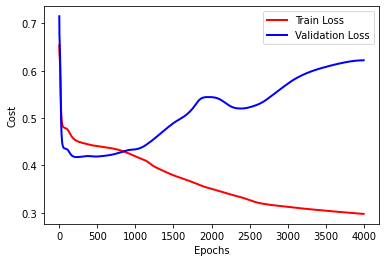

In [ ]:
plot(cost, cost_test)

In [ ]:
threshold= 0.5
def get_class(x):
  # Foward pass on x
  _,_,_,proba=forward_pass(x, w1, b1, w2, b2) # Get probability of x
  result= [1 if i >threshold else 0 for i in proba [0]] # Convert proba to 0 or 1. hint: list comprehension
  return np.array(result), proba

In [ ]:
y_pred, y_proba= get_class(x_test)

Congratulation: Your forward is correct.


In [ ]:
y_proba

array([[1.05305064e-03, 5.58587811e-02, 4.04393217e-01, 9.91807454e-05,
        4.17975343e-01, 2.50265295e-02, 2.83240681e-01, 1.60647847e-01,
        5.29861677e-04, 1.00658721e-01, 1.65370132e-03, 7.77269164e-01,
        4.34348453e-01, 2.57633605e-03, 1.78545593e-02, 1.09530774e-03,
        1.62928658e-02, 9.87897292e-01, 4.91363331e-01, 2.08330585e-03,
        1.58839457e-03, 3.89295901e-01, 9.96507992e-01, 8.09481777e-01,
        9.23995385e-01, 8.77759107e-01, 2.06989962e-01, 9.99801888e-01,
        8.53684016e-01, 7.12255628e-01, 3.78645161e-02, 9.98785178e-01,
        2.82389908e-02, 2.60531635e-02, 3.94989801e-03, 1.49623498e-01,
        8.14140497e-01, 6.94582905e-01, 1.13024796e-01, 9.27509305e-01,
        7.74336076e-03, 5.37077623e-02, 9.99806893e-01, 7.82765446e-01,
        2.84348084e-02, 1.57694531e-02, 5.45645901e-02, 9.93863414e-01,
        8.67014258e-01, 9.39596146e-01, 6.29484070e-01, 8.86962304e-01,
        9.64148491e-01, 2.51924113e-03, 9.56678688e-02, 2.521310

In [ ]:
def accuracy(y, y_pred):
  acc= (np.sum(y_pred == y)/len(y))
  assert (acc >= 0.75), 'Try again! your accuracy is not good. {}'.format(acc)
  print('✅✅✅ Congratulation! your accuracy is good.')
  return acc

In [ ]:
accuracy(y_test, y_pred)

✅✅✅ Congratulation! your accuracy is good.


0.8051948051948052

---
___
<p align= 'center'> <strong> End of coding from scratch </strong></p>

---
___

In [ ]:
# BGD
class NN:
  def __init__(self, x_test, y_test, size, num_epochs= 4000, lr= 0.001, threshold= 0.5):
    '''
    size: a list of dimensions
    '''
    self.x_test = x_test
    self.y_test = y_test
    self.size = size
    self.num_epochs = num_epochs
    self.lr = lr
    self.threshold = threshold
    self.params=self.weight_initialization()
    self.cost_train=[]
    self.cost_test=[]
    

  def sigmoid(self,x):
    sigm=1/(1+np.exp(-x))
    return sigm
  
  def dsigmoid(self,x):
    dsigm=sigmoid(x)*(1-sigmoid(x))
    return dsigm

  def tanh(self,x):
    t= 2*sigmoid(2*x)-1
    return t

  def dtanh(self,x):
    dt=1-tanh(x)**2
    return dt

  def cross_entropy(self,y,y_pred):
    loss=  -np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))/len(y)
    return loss
  
  def weight_initialization(self):
    input_dim= self.size[0]
    hidden_dim= self.size[1]
    output_dim= self.size[2]


    params = {
            'w1':np.random.randn(hidden_dim*input_dim).reshape(hidden_dim, input_dim)*1e-2,
            'b1':np.random.randn(hidden_dim).reshape(hidden_dim,1),
            'w2':np.random.randn(output_dim*hidden_dim).reshape(output_dim, hidden_dim)*1e-2,
            'b2':np.random.randn(output_dim).reshape(output_dim,1) 
        }

    return params

  def forward_pass(self,x, w1, b1, w2, b2):
    params= self.params

    w1= params['w1']
    b1= params['b1']

    w2= params['w2']
    b2= params['b2']

    # ForwardPass
    z1= w1@x.T+b1
    a1= self.tanh(z1)

    z2= w2@a1+b2
    a2=self.sigmoid(z2)

    assert (z1.shape==(self.size[1], x.shape[0]))
    assert (a1.shape==(self.size[1], x.shape[0]))

    assert (z2.shape==(self.size[2], x.shape[0]))
    assert (a2.shape==(self.size[2], x.shape[0]))

    print('Congratulation: Your forward is correct.')

    return z1, a1, z2, a2
  
  def backward_pass(self, x,y, w1, b1, w2, b2):
    params= self.params

    w1= params['w1']
    b1= params['b1']

    w2= params['w2']
    b2= params['b2']

    # Backward

    z1, a1, z2,a2= self.forward_pass(x, w1, b1, w2, b2)
    N= len(x)

    dw1= (((a2-y)*(1-a1**2))*w2.T)@x
    db1= (np.sum((((a2-y)*(1-a1**2))*w2.T),axis=1)/N).reshape(-1,1)
    assert (dw1.shape== w1.shape), 'The dimension of dw1 and w1 must be the same'
    assert (db1.shape== b1.shape), 'The dimension of db2 and b1 must be the same'


    dw2= (a2-y)@a1.T
    db2= 1/N*np.sum(a2-y,axis=1).reshape(1,1)

    # Dimension check
    assert (dw2.shape== w2.shape), 'The dimension of dw2 and w2 must be the same'
    assert (db2.shape== b2.shape), 'The dimension of db2 and b2 must be the same'

    print('Congratulation: Your Backward is correct.')

    return dw1, db1, dw2, db2

  def train(self, x, y):

    for i in range(self.num_epochs):

      # Get Params

      params= self.params

      w1= params['w1']
      b1= params['b1']

      w2= params['w2']
      b2= params['b2']

      dw1, db1, dw2, db2 = self.backward_pass(x,y, w1, b1, w2, b2)

      # Update parameters
      params['w1']=w1-self.lr*dw1
      params['b1']=b1-self.lr*db1

      params['w2']=w2-self.lr*dw2
      params['b2']=b2-self.lr*db2
    

      # Train Loss
      z1, a1, z2,y_pred= self.forward_pass(x, w1, b1, w2, b2)
      self.cost_train.append(self.cross_entropy(y,y_pred))

      # Test Loss
      z1, a1, z2,y_pred_test= self.forward_pass(x_test, w1, b1, w2, b2)
      self.cost_test.append(self.cross_entropy(y_test,y_pred_test))
    
  
  def get_class(self, x):
    w1, b1, w2, b2= self.params
    _,_,_,proba= self.forward_pass(x, w1, b1, w2, b2) # Get probability of x
    result= [1 if i >threshold else 0 for i in proba [0]] # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result), proba

  def accuracy(self, y,y_pred):
    return (np.sum(y_pred == y)/len(y))

  def plot(self):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_train)), self.cost_train, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_test)), self.cost_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()

In [ ]:
network=NN(x_train, y_train, size=[8,12,1], num_epochs= 4000, lr= 0.001, threshold= 0.5)
network.sigmoid(x_train)
network.weight_initialization()
network.train(x_train, y_train)

Streaming output truncated to the last 5000 lines.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your forward is correct.
Congratulation: Your Backward is correct.
Congratulation: Your forward is correct.


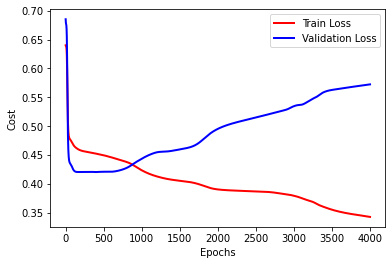

In [ ]:
network.plot()